## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 79us/step - loss: 1.9526 - acc: 0.2980 - val_loss: 1.7957 - val_acc: 0.3585
Epoch 2/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.7139 - acc: 0.3870 - val_loss: 1.7095 - val_acc: 0.3860
Epoch 3/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.6220 - acc: 0.4197 - val_loss: 1.5886 - val_acc: 0.4286
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5526 - acc: 0.4455 - val_loss: 1.5394 - val_acc: 0.4492
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5066 - acc: 0.4632 - val_loss: 1.5177 - val_acc: 0.4511
Epoch 6/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.4828 - acc: 0.4725 - val_loss: 1.4645 - val_acc: 0.4804
Epoch 7/100
50000/50000 [==============================] - 2s 44us/step - 

50000/50000 [==============================] - 2s 42us/step - loss: 0.5635 - acc: 0.7993 - val_loss: 2.0144 - val_acc: 0.5130
Epoch 58/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5470 - acc: 0.8047 - val_loss: 2.0873 - val_acc: 0.5027
Epoch 59/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5312 - acc: 0.8114 - val_loss: 2.0746 - val_acc: 0.5058
Epoch 60/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5096 - acc: 0.8178 - val_loss: 2.1204 - val_acc: 0.5067
Epoch 61/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.5342 - acc: 0.8093 - val_loss: 2.0620 - val_acc: 0.5135
Epoch 62/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5084 - acc: 0.8198 - val_loss: 2.1757 - val_acc: 0.5010
Epoch 63/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4930 - acc: 0.8228 - val_loss: 2.1748 - val_acc: 0.5059
Epoch 64/100
50000/50000 [==============

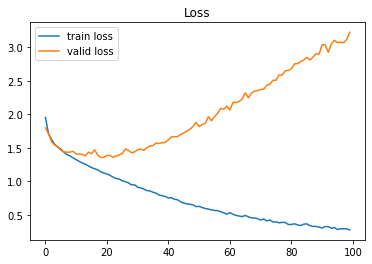

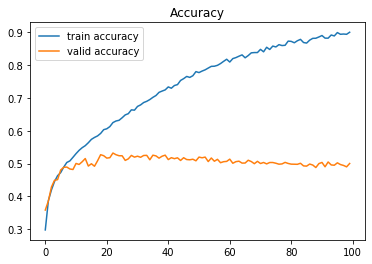

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢